Code for Kaggle's Titanic competition

In [9]:
#Importing libs
import pandas as pd #dataframes lib
import numpy as np #vectors lib
from sklearn import preprocessing #pre-processing lib
from sklearn import model_selection # model lib
from sklearn import metrics #metrics  lib
from scipy import stats #statistics libs
import statsmodels.api as stm #stats models lib
import seaborn as sns #beauty in graphs
import matplotlib.pyplot as plt #plot graphics

In [22]:
# Reading the dataset train
myFileName= "train.csv"
dtfTitanicTrain = pd.read_csv(myFileName, sep=',')
dtfTitanicTest = pd.read_csv("test.csv", sep=',')

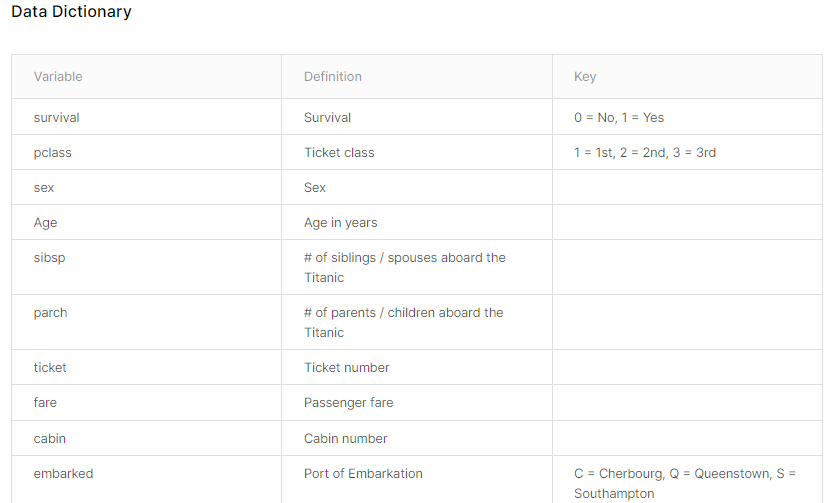

In [14]:
# GETTING INFORMATION - overview about dataset
def gettingInfoAbout (dtFrame):
  print("Info about dataset \n")
  dtfTitanicTrain.info()

  print("\nColumns in dataset: \n", dtfTitanicTrain.columns)

  print("\n5 firsts lines in dataset:\n", dtfTitanicTrain.head())

  print("\nDescribes dataset:\n")
  dtfTitanicTrain.describe()

# Correlation between columns
def correlationAbout(dtFrame):
  correlationMatrix = dtFrame.corr()
  # Plot the matix correlation between columns
  plt.figure(figsize = (10,7))
  sns.heatmap(correlationMatrix, annot=True)
  plt.show()

# values into each collumn
def uniquesColumnsIn(dtFrame):
  for column in dtFrame.columns:
    print("\n**************** COLUMN {} ****************".format(column))
    print("\nUniques values in column: \n", dtFrame[column].unique())
    print("\n")

In [26]:
# Calling the info methods
gettingInfoAbout(dtfTitanicTrain)

Info about dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Columns in dataset: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

5 firsts lines in dataset:
    PassengerId  Su

In [ ]:
# Calling the info methods
uniquesColumnsIn(dtfTitanicTest)

After first insights, let's go to reduce the dataset

In [27]:
# PRE-PROCESSING - refinig dataset
def refinesDataframe(dtFrame):
  print("\nPRE-PROCESSING started...")
  ## copying just columns will be useful to the model
  columnsToBeRemoved = ['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
  dtfRefined = dtFrame.drop(columns=columnsToBeRemoved, axis=1, inplace=False)
  #dtfRefined = dtFrame[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age']].copy()

  ## map for gender
  mapGender = {"female":0, "male":1}
  ### mapping sex to number, because it is a best practice to work a number instead object/text
  dtfRefined['Sex'] = dtfRefined['Sex'].map(mapGender)

  ## filling  Age with their own mean into NaN values
  dtfRefined.fillna({'Age' : dtfRefined['Age'].mean()})
  ## transform Age in a Scalar (0 until 1), bacause it is a best practice when has 'large' numbers
  myScaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
  dtfRefined['Age'] = myScaler.fit_transform(np.array(dtfRefined['Age']).reshape(-1, 1))

  return dtfRefined

In [ ]:
# PREPARING DATA TRAIN and TEST
## refining the data
dtfRefinedTrain = refinesDataframe(dtfTitanicTrain)
dtfRefinedTest = refinesDataframe(dtfTitanicTest)

## splitting the train data in inputs and outputs
dtfTrainInputs = dtfRefinedTrain.iloc[:, 2:]
dtfTrainOutputs = dtfRefinedTrain.iloc[:, 1]

## splitting the test data in inputs and outputs
dtfTestInputs = dtfRefinedTrain.iloc[:, 1:]
